In [20]:
from games.game import Game
from wrapper import GameDynamicsWrapper
from wrapper import VariedGame
from dynamics.replicator import Replicator
from dynamics.wright_fisher import WrightFisher
from dynamics.moran import Moran
%matplotlib inline

class Costly_Signaling(Game):
    DEFAULT_PARAMS = dict(lCost=3, hCost=1, a=5, aHigh=10, aLow=-10, lProp=2, hProp=1, bias_strength=0)
    PLAYER_LABELS = ('Low Sender', 'High Sender', 'Receiver')
    STRATEGY_LABELS = (('No', 'Low', 'Medium', 'High'),
                        ('No', 'Low', 'Medium', 'High'),
                        ('Accept all','Accept Low','Accept Medium','Accept High','Reject All'))

    def __init__(self, lCost=3, hCost=1, a=5, aHigh=10, aLow=-10, lProp=2, hProp=1, bias_strength=0, equilibrium_tolerance=0.2):
        lProp, hProp = lProp/(lProp+hProp), hProp/(lProp+hProp)
        lProp /= 2
        hProp /= 2

        payoff_matrix_p1 = [[[0 for x in range(5)] for x in range(4)] for x in range(4)]
        for i1, lowSenderStrat in enumerate(payoff_matrix_p1):
            for i2, highSenderStrat in enumerate(lowSenderStrat):
                for i3, payoff in enumerate(highSenderStrat):
                    if i1 >= i3:
                        payoff_matrix_p1[i1][i2][i3] += a
                    payoff_matrix_p1[i1][i2][i3] -= lCost * i1

        payoff_matrix_p2 = [[[0 for x in range(5)] for x in range(4)] for x in range(4)]
        for i1, lowSenderStrat in enumerate(payoff_matrix_p1):
            for i2, highSenderStrat in enumerate(lowSenderStrat):
                for i3, payoff in enumerate(highSenderStrat):
                    if i2 >= i3:
                        payoff_matrix_p2[i1][i2][i3] += a
                    payoff_matrix_p2[i1][i2][i3] -= hCost * i2

        payoff_matrix_p3 = [[[0 for x in range(5)] for x in range(4)] for x in range(4)]
        for i1, lowSenderStrat in enumerate(payoff_matrix_p1):
            for i2, highSenderStrat in enumerate(lowSenderStrat):
                for i3, payoff in enumerate(highSenderStrat):
                    if i1 >= i3:#Low sender accepted
                        payoff_matrix_p3[i1][i2][i3] += aLow * lProp
                    if i2 >= i3:
                        payoff_matrix_p3[i1][i2][i3] += aHigh * hProp

        payoff_matrix = [payoff_matrix_p1, payoff_matrix_p2, payoff_matrix_p3]

        player_dist = (lProp, hProp, 1/2)

        super(Costly_Signaling, self).__init__(payoff_matrices=payoff_matrix, \
            player_frequencies=player_dist, bias_strength=bias_strength, equilibrium_tolerance=equilibrium_tolerance)
        
    def test_single_simulation(self):
        s = GameDynamicsWrapper(Costly_Signaling, WrightFisher)
        s.simulate(num_gens=50, graph=dict(area=True,options=['smallfont']))
        # s.simulate(num_gens=100,graph=dict(area=True,options=['smallfont']))




In [21]:
av = Costly_Signaling()

/home/amit/Desktop/ManojSharma/dynamics_sim/dynamics_sim-master/dynamics/dynamics.py:196: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  strategies.append(np.array([r[j] for j in range(self.number_groups)]))
/home/amit/Desktop/ManojSharma/dynamics_sim/dynamics_sim-master/dynamics/dynamics.py:197: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  payoffs.append(np.array([p[j] for j in range(self.number_groups)]))


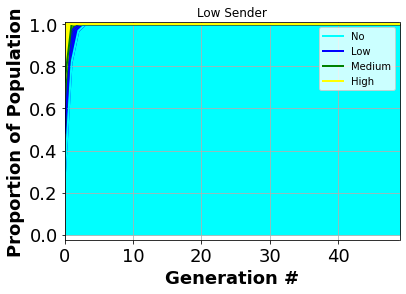

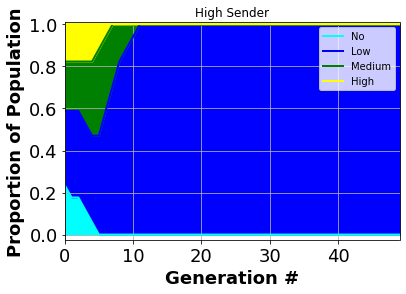

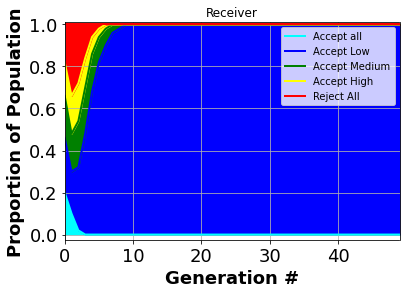

In [22]:
av.test_single_simulation()

In [ ]:
def test_single_simulation(self):
    s = GameDynamicsWrapper(Costly_Signaling, WrightFisher)
    s.simulate(num_gens=50, graph=dict(area=True),options=['smallfont'])
    #s.simulate(num_gens=100,pop_size=100,graph=dict(area=True,options=['smallfont']))